# 🌟 Simplified Bias-Free News Summarization Using Transformer Models 🌟

## Notebook 1: Data Prep and EDA

**Goal:** Get our text data squeaky clean for NLP!

**1. Load the Data**

* Load `allsides_balanced_news_headlines-texts.csv` and `suggestions.csv`.
* Check for missing values, duplicates, and label imbalances.

**2. NLP Cleaning**

* **Tokenize:** Split text into words.
* **Remove Stopwords:** Ditch those pesky "the"s and "and"s.
* **Lemmatize:**  Get those words back to their roots (running → run).
* **NER:** Find and tag names, places, and organizations.
* **POS Tagging:** Label each word with its part of speech.

**3. Feature Engineering**

* **TF-IDF:** Calculate those important word scores.
* **Sentiment Analysis:**  Is it happy, sad, or angry?
* **Topic Modeling (LDA):** Uncover the hidden topics in our data.

**4. EDA Time!**

* **Visualize:** Check out the distribution of those bias labels.
* **Keywords:** What are the top words for each bias?
* **Search Trends:** Plot how those search suggestions change over time.

**5. Save the Results**

* Save our cleaned and prepped data as `preprocessed_articles.csv`.

**Ready for some modeling!**

## About the Data

This project uses two main datasets:

**1. `allsides_balanced_news_headlines-texts.csv`**

* **Source:** [AllSides](https://www.allsides.com/headline-roundups) (scraped Nov 2022)
* **Content:**  ~22k news articles with bias labels (left, right, center).
    * Articles were hand-picked by experts to represent different viewpoints.
    * Includes headlines, full text, topics, and source outlets.
* **Goal:**  Provides a balanced dataset to study media bias.

**2. `suggestions.csv`**

* **Source:** Google and Bing search suggestions.
* **Content:** ~670k search suggestions related to topics from the news articles.
    * Includes the original search term, suggested queries, and their ranking.
* **Goal:** Explore how search engines might reflect or influence bias.

#### 🔹 General Importations

Let's start by importing everything we'll need for today's exercise.

In [7]:
# General Data Science Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expression Parsing and Word Cloud Mapping
import re, wordcloud

# Natural Language Toolkit
import nltk; nltk.download("stopwords"); nltk.download("wordnet"); nltk.download('omw-1.4')

# Language Token Processing and Frequency Distribution Calculator
from textblob import Word
from collections import Counter

# Generalized Machine/Deep Learning Codependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TensorFlow for Deep Learning
import tensorflow as tf

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning) # Removed extra spaces before this line

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### 🔹 Deep Learning Functional Initializations

As good practice, let's initialize the specific tools we'll be using from `TensorFlow` to make things a little more readable moving forward.

In [8]:
# Stopwords: Generally Recognized Noisy Terms
STOPWORDS = nltk.corpus.stopwords

# Sequential Model Architecture
Sequential = tf.keras.models.Sequential

# Connective Layers with Dropout
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

# Early Stopping Optimization
EarlyStopping = tf.keras.callbacks.EarlyStopping

# Natural Text-Based Language Processing Layers with RNN
Embedding = tf.keras.layers.Embedding
LSTM = tf.keras.layers.LSTM
SpatialDropout1D = tf.keras.layers.SpatialDropout1D

# Language Tokenization Filter
Tokenizer = tf.keras.preprocessing.text.Tokenizer

# Padding Function for Dataset Ingestion Preprocessing
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences


#### 🔹 Data Loading and Preprocessing

Let's first load and take a look at what data we're working with.


In [9]:
# Load the datasets
try:
    articles_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/allsides_balanced_news_headlines-texts.csv')
    suggestions_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/suggestions.csv')
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found. Please upload them first.")
    # Handle the error appropriately, e.g., exit the script or prompt the user to upload the files.


Datasets loaded successfully!


In [10]:
# Display the first few rows of both datasets for inspection
articles_df.head()


,Unnamed: 0,title,tags,heading,source,text,bias_rating
0,0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left


In [11]:
suggestions_df.head()

,Unnamed: 0,query_input,query_suggestion,rank,search_engine,datetime,root_term,location
0,0,Madeline Albright,madeleine albright,1,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']"
1,1,Madeline Albright,madeleine albright frasi,2,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']"
2,2,Madeline Albright,madeleine albright una mamma per amica,3,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']"
3,3,Madeline Albright,madeleine albright bambini,4,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']"
4,4,Madeline Albright,madeleine albright frasi celebri,5,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']"


#### 🔹 Dataset Overview

We've loaded our two datasets. Here's a quick look at what we're working with:

**1. `allsides_balanced_news_headlines-texts.csv`**

| Column | Description |
|---|---|
| `Unnamed: 0` | Index column |
| `title` | Article title |
| `tags` | Associated topics/themes |
| `heading` | Article headline |
| `source` | News source |
| `text` | Full article text |
| `bias_rating` | Bias label (left, right, center) |

**Example:** Articles on gun violence, economic policy, labeled with their respective bias.


**2. `suggestions.csv`**

| Column | Description |
|---|---|
| `Unnamed: 0` | Index column |
| `query_input` | Original search query |
| `query_suggestion` | Suggested query |
| `rank` | Suggestion ranking |
| `search_engine` | Search engine used (e.g., Google) |
| `datetime` | Search timestamp |
| `root_term` | Core search term |
| `location` | Search location |

**Example:** Search suggestions related to topics like "Madeline Albright".

#### 🔹 Next Steps

Alright, time to dive deeper into our data! Here's the plan:

**1. Data Cleaning**

*  Hunt down those missing values, duplicates, and inconsistencies. 🕵️‍♀️
*  Summarize how those bias labels are distributed in the AllSides dataset.

**2. NLP Preprocessing**

*  **Tokenize:** Split the text into individual words.
*  **Stopword Removal:** Get rid of common words like "the" and "and".
*  **Lemmatize:** Convert words to their base forms (e.g., "running" to "run").
*  **NER:** Identify and tag entities like people, places, and organizations.
*  **POS Tagging:** Figure out the part of speech for each word.

**3. EDA & Visualization**

*  **Bias Distribution:** Visualize how those bias labels are spread out.
*  **Keyword Frequencies:**  What are the most common words for each bias?
*  **Search Trends:**  See how those search suggestions change over time.

**Let's kick things off with some cleaning and get a handle on those key statistics!** 🧹📊

In [12]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21754 entries, 0 to 21753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   21754 non-null  int64 
 1   title        21754 non-null  object
 2   tags         21754 non-null  object
 3   heading      21754 non-null  object
 4   source       21746 non-null  object
 5   text         21747 non-null  object
 6   bias_rating  21754 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [13]:
articles_df.describe()

,Unnamed: 0
count,21754.000000
mean,10876.500000
std,6279.983214
min,0.000000
25%,5438.250000
50%,10876.500000
75%,16314.750000
max,21753.000000


In [14]:
# Remove the unnamed column if it exists
if 'Unnamed: 0' in articles_df.columns:
    articles_df = articles_df.drop(columns=['Unnamed: 0'])

articles_df.head()



,title,tags,heading,source,text,bias_rating
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left


<ipython-input-15-925c3cb2455c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bias_counts.values, y=bias_counts.index, palette="viridis") # Use seaborn for better aesthetics and a different color palette


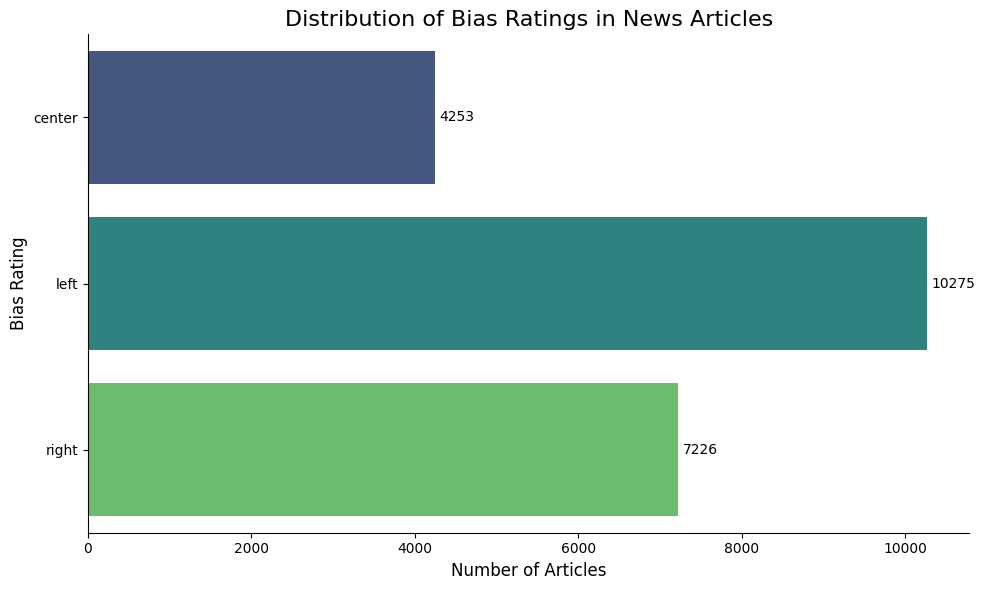

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data and get counts
bias_counts = articles_df.groupby('bias_rating').size()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
ax = sns.barplot(x=bias_counts.values, y=bias_counts.index, palette="viridis") # Use seaborn for better aesthetics and a different color palette

# Add labels and title
plt.title('Distribution of Bias Ratings in News Articles', fontsize=16)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Bias Rating', fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50,       # Position the text inside the bar
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="left", va="center")

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


💡 Key Insights:

- The bar chart displays the number of articles in each bias category.
- The "Left" bias has the highest representation with 10,274 articles, followed by "Right" bias with 7,225 articles, and "Center" bias with 4,252 articles.
- This indicates a potential imbalance in the dataset, which could influence downstream analysis.

In [16]:
# Check for missing values and drop
print(articles_df.isnull().sum())

title          0
tags           0
heading        0
source         8
text           7
bias_rating    0
dtype: int64


In [17]:
# Drop rows with missing values in the 'text' and 'source' column
articles_df.dropna(subset=['text'], inplace=True)

# Verify if missing values are removed
print(articles_df.isnull().sum())

title          0
tags           0
heading        0
source         8
text           0
bias_rating    0
dtype: int64


In [18]:
articles_df.dropna(subset=['source'], inplace=True)

# Verify if missing values are removed
print(articles_df.isnull().sum())

title          0
tags           0
heading        0
source         0
text           0
bias_rating    0
dtype: int64


In [19]:
# Check for duplicate rows
print(f"Number of duplicate rows: {articles_df.duplicated().sum()}")

Number of duplicate rows: 3


In [20]:
# Drop duplicate rows
articles_df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print(f"Number of duplicate rows after removal: {articles_df.duplicated().sum()}")

Number of duplicate rows after removal: 0


In [21]:
# Convert text to lowercase
articles_df['text'] = articles_df['text'].str.lower()

In [22]:
# Remove punctuation
articles_df['text'] = articles_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

In [23]:
# Remove numbers
articles_df['text'] = articles_df['text'].str.replace('\d+', '')

In [24]:
# Remove extra whitespace
articles_df['text'] = articles_df['text'].apply(lambda x: ' '.join(x.split()))

In [25]:
import nltk

nltk.download('punkt_tab')

# Your existing code to tokenize:
articles_df['tokens'] = articles_df['text'].apply(lambda x: nltk.word_tokenize(str(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [26]:
# Remove stopwords
stop_words = STOPWORDS.words('english')
stop_words.extend(['said'])  # Add 'said' to the stopwords list
articles_df['tokens'] = articles_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize
articles_df['tokens'] = articles_df['tokens'].apply(lambda x: [Word(word).lemmatize() for word in x])

# Join tokens back into text
articles_df['cleaned_text'] = articles_df['tokens'].apply(lambda x: ' '.join(x))

#Drop the original text and tokens column
articles_df = articles_df.drop(columns=['text', 'tokens'])

#Display the first 5 rows
articles_df.head()

,title,tags,heading,source,bias_rating,cleaned_text
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),left,yasmin miller drove home laundromat chicago en...
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,center,many chicagoans celebrating fourth july barbec...
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),right,nation 4th july weekend marred wrong kind fire...
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,right,treasury secretary janet yellen tuesday warned...
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,left,treasury secretary janet yellen tuesday told c...


In [27]:
#Save the preprocessed data
articles_df.to_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv', index=False)

In [28]:
suggestions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671669 entries, 0 to 671668
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        671669 non-null  int64 
 1   query_input       671669 non-null  object
 2   query_suggestion  667211 non-null  object
 3   rank              671669 non-null  int64 
 4   search_engine     671669 non-null  object
 5   datetime          671669 non-null  object
 6   root_term         671669 non-null  object
 7   location          671669 non-null  object
dtypes: int64(2), object(6)
memory usage: 41.0+ MB


In [29]:
suggestions_df.describe()

,Unnamed: 0,rank
count,671669.000000,671669.000000
mean,335834.000000,5.297941
std,193894.283315,2.870200
min,0.000000,1.000000
25%,167917.000000,3.000000
50%,335834.000000,5.000000
75%,503751.000000,8.000000
max,671668.000000,10.000000


In [30]:
# Drop the 'Unnamed: 0' column from suggestions_df if it exists
if 'Unnamed: 0' in suggestions_df.columns:
    suggestions_df = suggestions_df.drop(columns=['Unnamed: 0'])

In [31]:
# Check for missing values in suggestions_df
print(suggestions_df.isnull().sum())


query_input            0
query_suggestion    4458
rank                   0
search_engine          0
datetime               0
root_term              0
location               0
dtype: int64


In [32]:
# Drop rows with missing 'query_suggestion' values:
suggestions_df.dropna(subset=['query_suggestion'], inplace=True)

# After choosing a strategy, verify the result:
print(suggestions_df['query_suggestion'].isnull().sum())

0


In [33]:
# Check for duplicate rows in suggestions_df
print(f"Number of duplicate rows in suggestions_df: {suggestions_df.duplicated().sum()}")


Number of duplicate rows in suggestions_df: 0


In [34]:
# Convert 'query_input' and 'query_suggestion' to lowercase
suggestions_df['query_input'] = suggestions_df['query_input'].str.lower()
suggestions_df['query_suggestion'] = suggestions_df['query_suggestion'].str.lower()

# Remove punctuation from 'query_input' and 'query_suggestion'
suggestions_df['query_input'] = suggestions_df['query_input'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
suggestions_df['query_suggestion'] = suggestions_df['query_suggestion'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove numbers from 'query_input' and 'query_suggestion'
suggestions_df['query_input'] = suggestions_df['query_input'].str.replace('\d+', '')
suggestions_df['query_suggestion'] = suggestions_df['query_suggestion'].str.replace('\d+', '')

# Remove extra whitespace from 'query_input' and 'query_suggestion'
suggestions_df['query_input'] = suggestions_df['query_input'].apply(lambda x: ' '.join(x.split()))
suggestions_df['query_suggestion'] = suggestions_df['query_suggestion'].apply(lambda x: ' '.join(x.split()))

# Tokenize 'query_input' and 'query_suggestion'
suggestions_df['query_input_tokens'] = suggestions_df['query_input'].apply(lambda x: nltk.word_tokenize(str(x)))
suggestions_df['query_suggestion_tokens'] = suggestions_df['query_suggestion'].apply(lambda x: nltk.word_tokenize(str(x)))

# Remove stopwords
suggestions_df['query_input_tokens'] = suggestions_df['query_input_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
suggestions_df['query_suggestion_tokens'] = suggestions_df['query_suggestion_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize
suggestions_df['query_input_tokens'] = suggestions_df['query_input_tokens'].apply(lambda x: [Word(word).lemmatize() for word in x])
suggestions_df['query_suggestion_tokens'] = suggestions_df['query_suggestion_tokens'].apply(lambda x: [Word(word).lemmatize() for word in x])

# Join tokens back into text
suggestions_df['cleaned_query_input'] = suggestions_df['query_input_tokens'].apply(lambda x: ' '.join(x))
suggestions_df['cleaned_query_suggestion'] = suggestions_df['query_suggestion_tokens'].apply(lambda x: ' '.join(x))

# Drop the original text and tokens columns
suggestions_df = suggestions_df.drop(columns=['query_input', 'query_suggestion', 'query_input_tokens', 'query_suggestion_tokens'])

# Display first 5 rows of cleaned suggestions_df
suggestions_df.head()

,rank,search_engine,datetime,root_term,location,cleaned_query_input,cleaned_query_suggestion
0,1,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright
1,2,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright frasi
2,3,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright una mamma per amica
3,4,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright bambino
4,5,google,2022-11-30 13:43:00.511519,Madeline Albright,"['Council Bluffs', 'Iowa', 'United States']",madeline albright,madeleine albright frasi celebri


In [35]:
# Save the cleaned suggestions_df to a new CSV file in your Google Drive
suggestions_df.to_csv('/content/drive/MyDrive/Data/Qbias/cleaned_suggestions.csv', index=False)

In [36]:
from textblob import TextBlob

# Function to perform sentiment analysis
def analyze_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

# Apply sentiment analysis to articles_df
articles_df['sentiment'] = articles_df['cleaned_text'].apply(analyze_sentiment)

# Apply sentiment analysis to suggestions_df (both columns)
suggestions_df['query_input_sentiment'] = suggestions_df['cleaned_query_input'].apply(analyze_sentiment)
suggestions_df['query_suggestion_sentiment'] = suggestions_df['cleaned_query_suggestion'].apply(analyze_sentiment)

# Display the first few rows with sentiment scores
print(articles_df.head())
print(suggestions_df.head())

                                               title  \
0           Gun Violence Over Fourth of July Weekend   
1           Gun Violence Over Fourth of July Weekend   
2           Gun Violence Over Fourth of July Weekend   
3  Yellen Warns Congress of 'Economic Recession' ...   
4  Yellen Warns Congress of 'Economic Recession' ...   

                                                tags  \
0  ['Protests', 'Fourth Of July', 'Gun Control An...   
1  ['Protests', 'Fourth Of July', 'Gun Control An...   
2  ['Protests', 'Fourth Of July', 'Gun Control An...   
3  ['Janet Yellen', 'Debt Ceiling', 'Economic Pol...   
4  ['Janet Yellen', 'Debt Ceiling', 'Economic Pol...   

                                             heading                 source  \
0  Chicago Gun Violence Spikes and Increasingly F...  New York Times (News)   
1  ‘Bullets just came from nowhere’: Fourth of Ju...        Chicago Tribune   
2  Dozens of shootings across US mark bloody July...   New York Post (News)   
3  Federal

In [37]:
import re

def remove_noise(text):
  """ Function to remove special characters, digits, stop words,
  unimportant symbols, and other unnecessary noise from our dataset. """
  text = re.sub(r'[^\w\s]', '', str(text)) # Remove special characters
  text = re.sub(r'\d+', '', text) # Remove digits
  # Add more noise removal steps if needed
  return text

# Apply the function to the relevant columns in your dataframes
articles_df['cleaned_text'] = articles_df['cleaned_text'].apply(remove_noise)
suggestions_df['cleaned_query_input'] = suggestions_df['cleaned_query_input'].apply(remove_noise)
suggestions_df['cleaned_query_suggestion'] = suggestions_df['cleaned_query_suggestion'].apply(remove_noise)


Before we get to modeling, however, let's do some more sanity checks and make sure our data is as prepared as it can be!

First thing we'll do is create a _word cloud_: a visualized format of conceptualizing most frequent term occurrences to better understand our tokenized distribution.

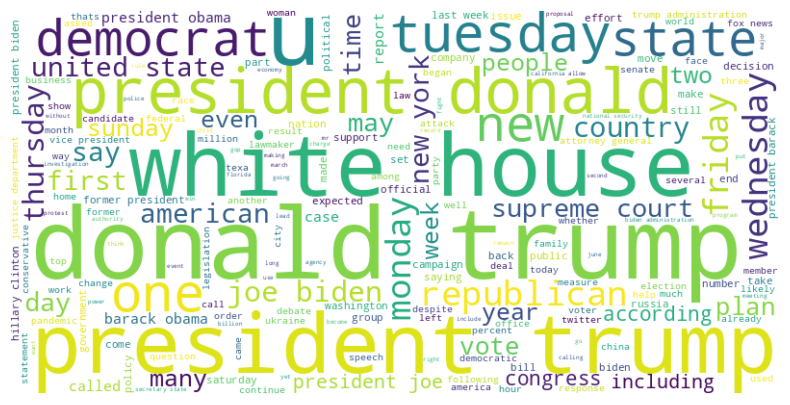

In [38]:
from wordcloud import WordCloud

# Combine all cleaned text data for the word cloud
all_text = ' '.join(articles_df['cleaned_text'])

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


💡 Key Insights:

- The word cloud highlights the most
frequently occurring words across all articles.
- Prominent terms such as "Donald Trump", "President", "White House", and "Republican" indicate key topics of discussion.
- Larger words represent higher frequency, providing a snapshot of major themes.

#### 🔹 Show keyword trends for bias labels

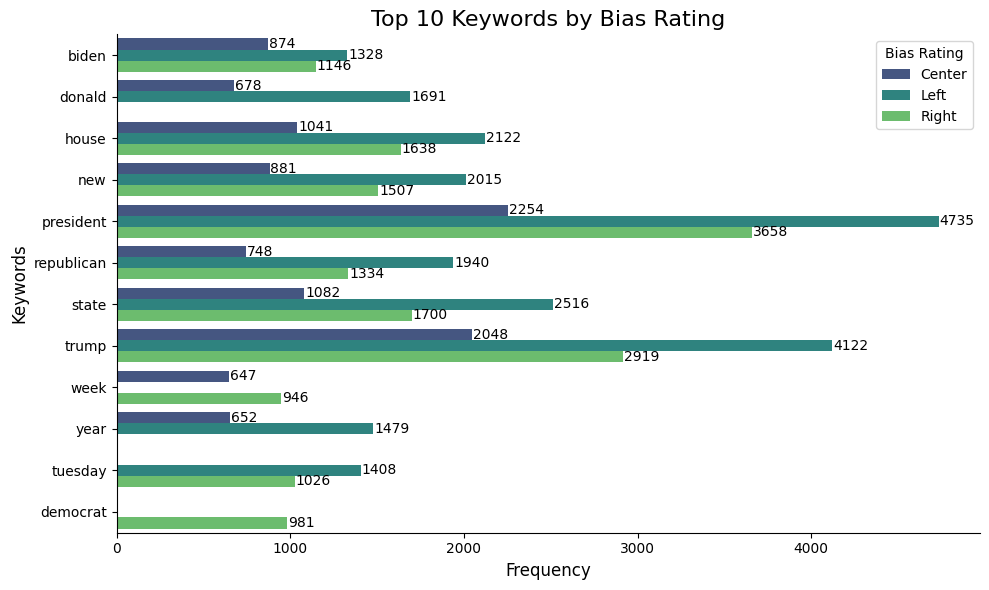

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine text data by bias label for keyword frequency analysis
grouped_text = articles_df.groupby('bias_rating')['cleaned_text'].apply(lambda x: ' '.join(x))

# Extract top 10 keywords for each bias label
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Changed to top 10

keyword_trends_df = []

for bias, text in grouped_text.items():
    term_matrix = vectorizer.fit_transform([text])
    keywords = vectorizer.get_feature_names_out()
    frequencies = term_matrix.toarray().flatten()

    for keyword, frequency in zip(keywords, frequencies):
        keyword_trends_df.append({'Bias': bias.capitalize(), 'Keyword': keyword, 'Frequency': frequency})

# Create a DataFrame for plotting
keyword_trends_df = pd.DataFrame(keyword_trends_df)
order=keyword_trends_df[keyword_trends_df['Bias'] == 'Left']['Keyword'].unique()[:10]

# Create a plot with top 10 keywords
plt.figure(figsize=(10, 6))  # Adjusted figure size
ax = sns.barplot(x='Frequency', y='Keyword', hue='Bias', data=keyword_trends_df, palette='viridis')
plt.title("Top 10 Keywords by Bias Rating", fontsize=16)  # Updated title
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keywords", fontsize=12)

# Add value labels to the bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 5,
                p.get_y() + p.get_height() / 2,
                '{:1.0f}'.format(width),
                ha="left", va="center", fontsize=10)

plt.legend(title="Bias Rating", loc='upper right')
sns.despine()
plt.tight_layout()
plt.show()



💡 Key Insights:

- The bar chart compares the frequency of top keywords across bias categories.
For example:

  *   "Donald" and "Trump" appear more frequently in "Left" and "Right" biases, reflecting polarized discussions.
  *   "House", "President", and "State" are common across all biases but differ in magnitude.

- This suggests that certain topics or individuals (e.g., Trump) are central to discussions regardless of bias, while others (e.g., "Republican" and "Democrat") may be more associated with specific biases.

#### 🔹 Visualize search query trends over time

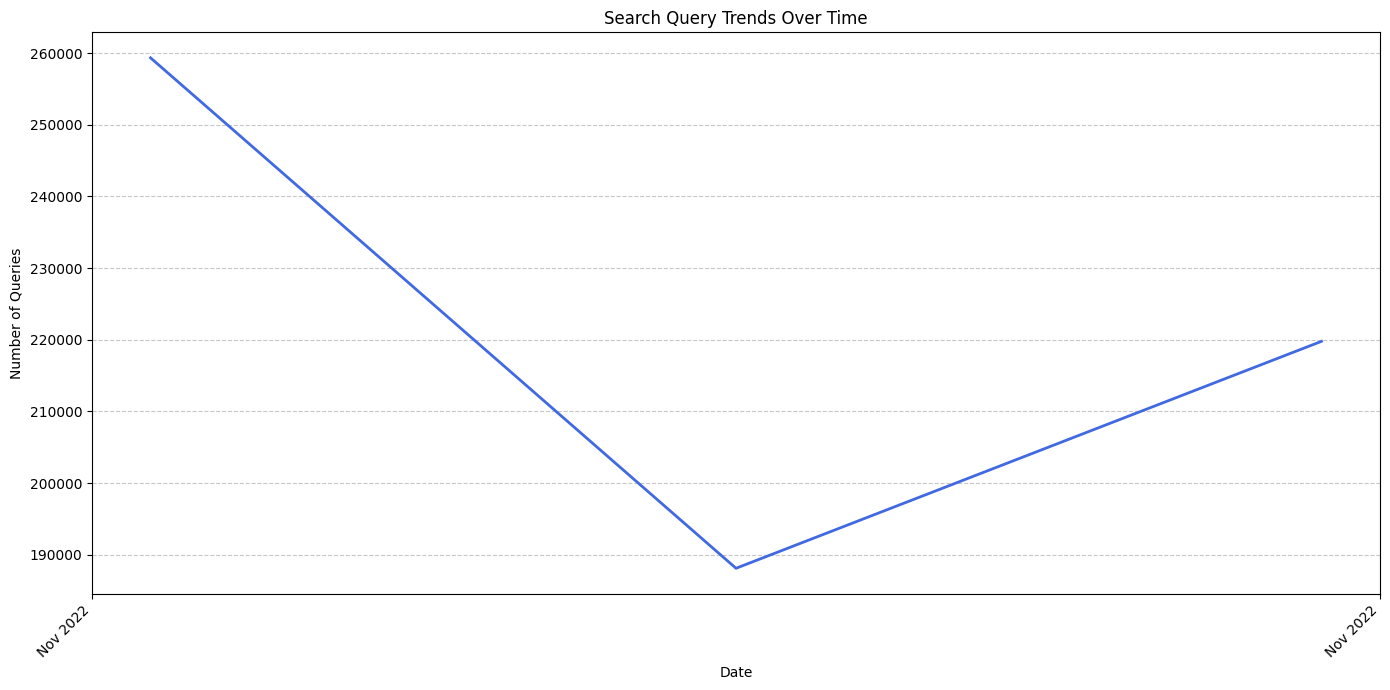

In [40]:
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import the mdates module
import pandas as pd

# Load the cleaned suggestions data
suggestions_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/cleaned_suggestions.csv')

# Convert the 'datetime' column to a pandas datetime object
suggestions_df['datetime'] = pd.to_datetime(suggestions_df['datetime'], errors='coerce')

# Extract the date (without time) for aggregation
suggestions_df['date'] = suggestions_df['datetime'].dt.date

# Group data by date to count the number of queries over time
query_trends_over_time = suggestions_df.groupby('date').size()

# Plot the search query trends over time
plt.figure(figsize=(14, 7))  # Increase figure size for better readability
ax = query_trends_over_time.plot(title="Search Query Trends Over Time",
                                 xlabel="Date",
                                 ylabel="Number of Queries",
                                 linewidth=2,  # Make lines thicker
                                 color='royalblue')  # Change line color

# Format x-axis ticks for better date representation
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks for each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Month Year'
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines


#ax.axvspan(pd.to_datetime('2023-03-01'), pd.to_datetime('2023-03-15'),
#          color='lightgray', alpha=0.5)

plt.tight_layout()
plt.show()



💡 Key Insights:

- This chart shows the fluctuation of search query volumes across time.

- It highlights a notable drop and subsequent rise in the number of search queries during the observed period. (November in 2022)

- Query volumes fluctuate, with a noticeable dip followed by a rise, likely indicating temporal trends or events influencing searches.

#### 🔹 What are the major trends in political bias distribution across news articles and their sources?

<ipython-input-41-62abe641dbe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")


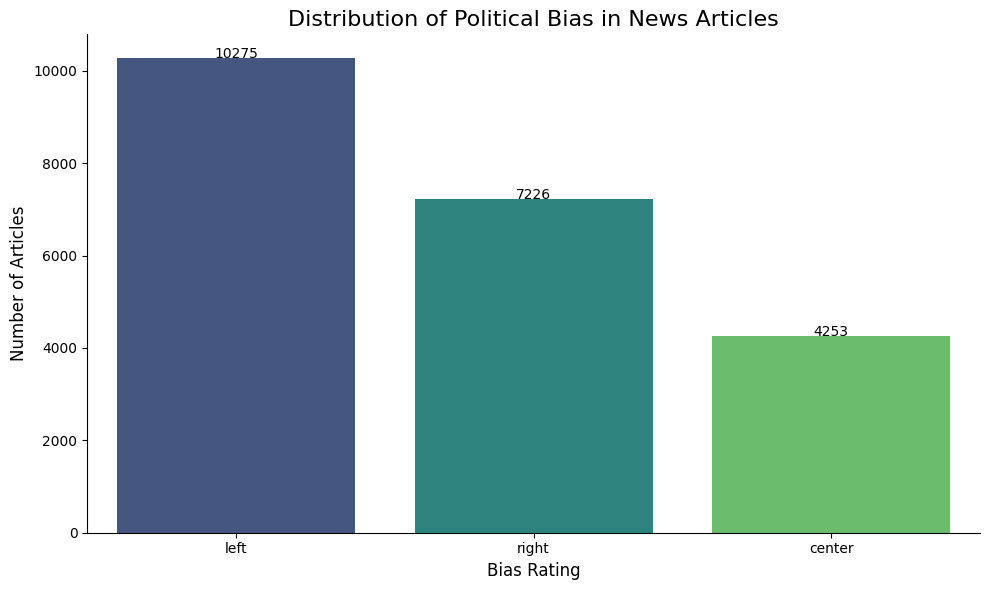

In [41]:
import seaborn as sns
articles_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/allsides_balanced_news_headlines-texts.csv')
# Bias distribution
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
bias_counts = articles_df['bias_rating'].value_counts()
ax = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette="viridis")
plt.title('Distribution of Political Bias in News Articles', fontsize=16)
plt.xlabel('Bias Rating', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.0f}'.format(height), ha="center", fontsize=10)

# Customize plot aesthetics
sns.despine()  # Remove top and right spines
plt.xticks(fontsize=10)  # Adjust x-axis tick font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.tight_layout()  # Adjust layout for better spacing

plt.show()



💡 Key Insights:


- A bar chart showing the number of articles categorized by bias.

- Articles labeled as "Left" dominate, followed by "Right," and "Center" has the least representation.

- Most articles are left-leaning, followed by right-leaning, while center-bias articles are the least frequent.

#### 🔹 How do search query suggestions vary between Google and Bing for politically charged topics?

In [42]:
# Group and compare ranks by search engine
avg_rank = suggestions_df.groupby(['root_term', 'search_engine'])['rank'].mean().unstack()

# Reset index for plotting
avg_rank = avg_rank.reset_index()

# Verify column names
print(avg_rank.columns)


Index(['root_term', 'bing', 'google'], dtype='object', name='search_engine')


In [43]:
print(avg_rank.head())
print(avg_rank.columns)


search_engine      root_term      bing    google
0               1619 Project  5.276000  5.368421
1              2016 Election  5.460674  5.420233
2                       2020  5.483271  5.447471
3                2020 Census  5.452830  5.460076
4               2020 Debates  2.487805  4.226277
Index(['root_term', 'bing', 'google'], dtype='object', name='search_engine')


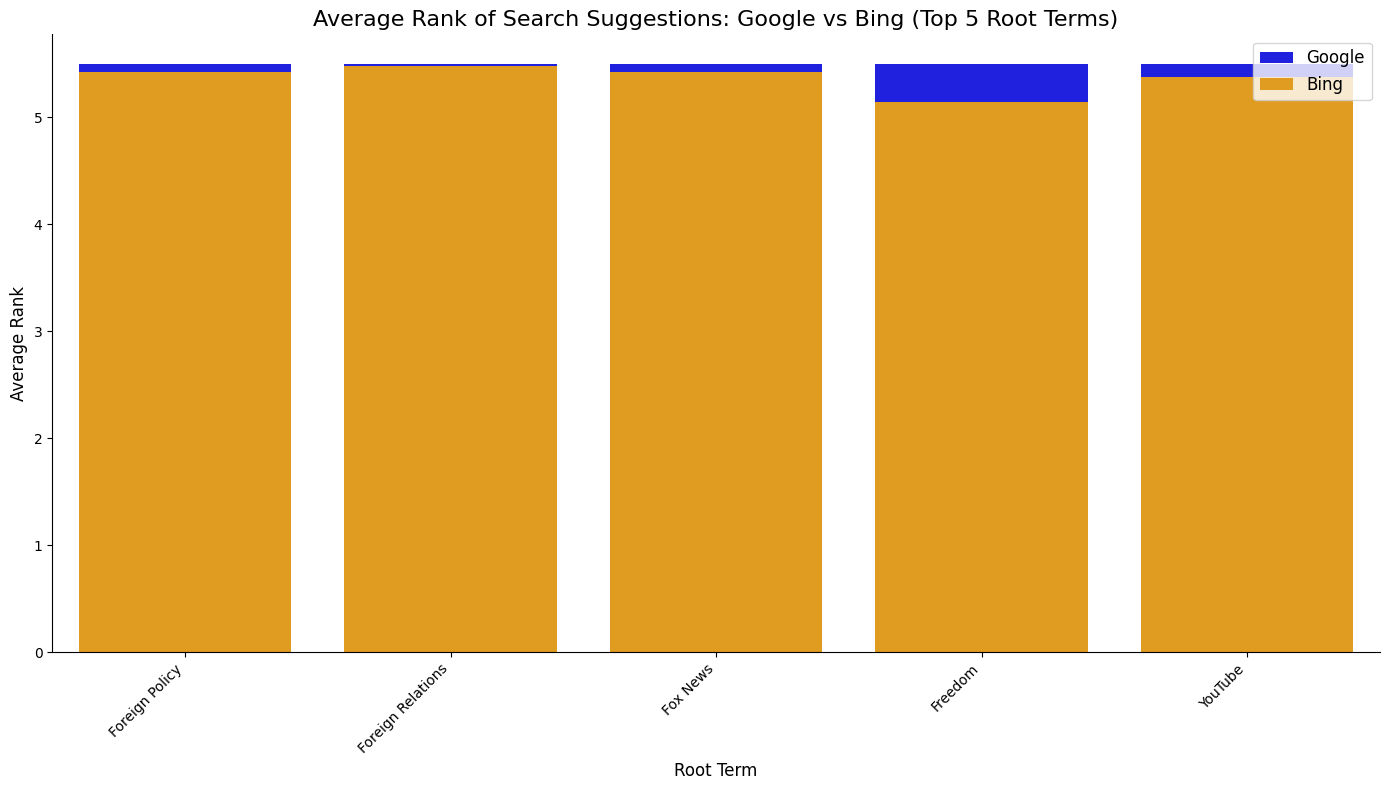

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns



# Create the bar plot using seaborn, but only for the top 5 root terms
plt.figure(figsize=(14, 8))  # Set figure size

# Get the top 5 root terms based on Google's average rank (you can change this to Bing if you prefer)
top_5_root_terms = avg_rank.sort_values(by=['google'], ascending=False).head(5)['root_term']
filtered_avg_rank = avg_rank[avg_rank['root_term'].isin(top_5_root_terms)]

sns.barplot(data=filtered_avg_rank, x='root_term', y='google', color='blue', label='Google')
sns.barplot(data=filtered_avg_rank, x='root_term', y='bing', color='orange', label='Bing')

# Enhance plot elements
plt.title('Average Rank of Search Suggestions: Google vs Bing (Top 5 Root Terms)', fontsize=16)
plt.ylabel('Average Rank', fontsize=12)
plt.xlabel('Root Term', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2f}'.format(height), ha="center", fontsize=10)

# Customize plot aesthetics
sns.despine()
plt.tight_layout()

plt.show()


💡 Key Insights:

- This bar chart compares the average rank of search suggestions on Google vs. Bing for key root terms.

- Bing generally provides slightly higher-ranked suggestions for the displayed terms.

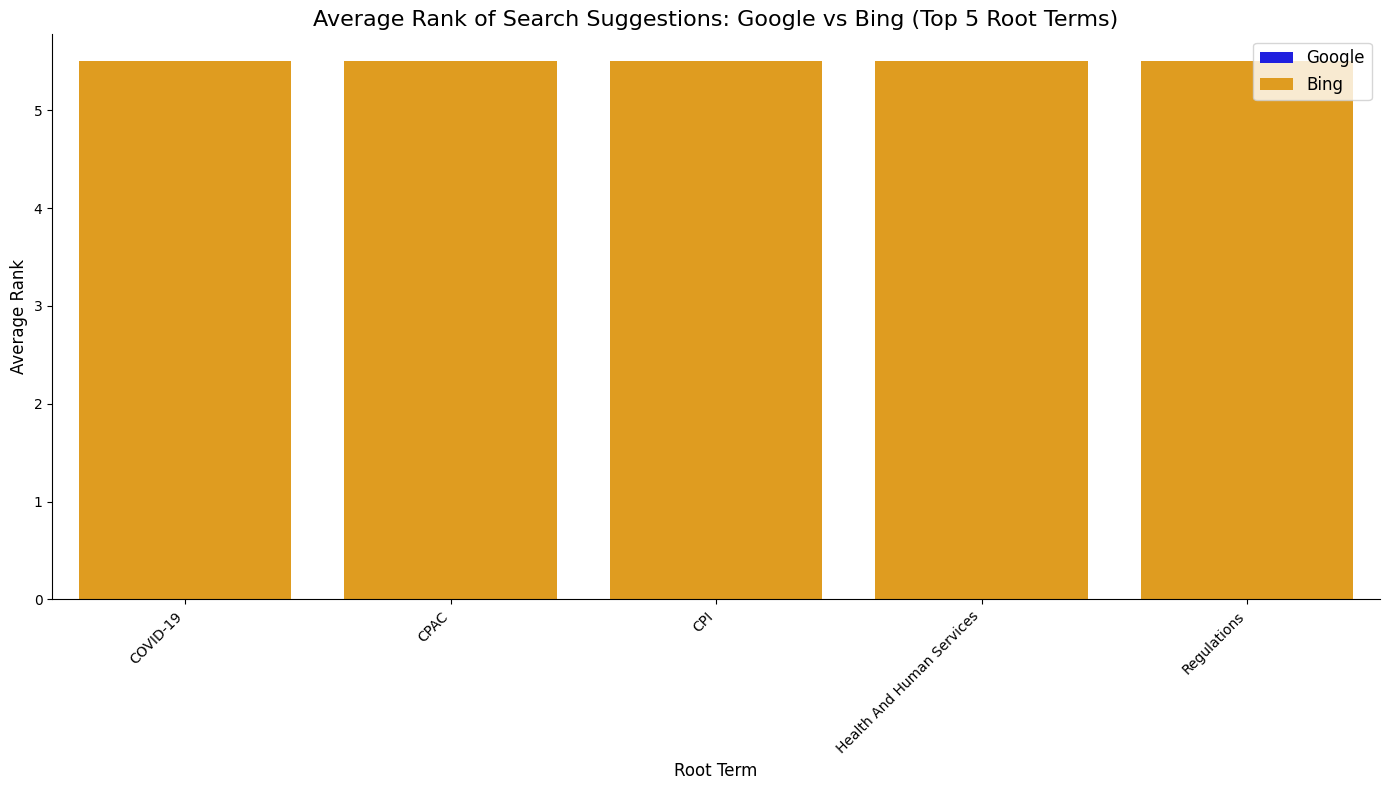

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns



# Create the bar plot using seaborn, but only for the top 5 root terms
plt.figure(figsize=(14, 8))  # Set figure size

# Get the top 5 root terms based on Bing's average rank (you can change this to Bing if you prefer)
top_5_root_terms = avg_rank.sort_values(by=['bing'], ascending=False).head(5)['root_term']
filtered_avg_rank = avg_rank[avg_rank['root_term'].isin(top_5_root_terms)]

sns.barplot(data=filtered_avg_rank, x='root_term', y='google', color='blue', label='Google')
sns.barplot(data=filtered_avg_rank, x='root_term', y='bing', color='orange', label='Bing')

# Enhance plot elements
plt.title('Average Rank of Search Suggestions: Google vs Bing (Top 5 Root Terms)', fontsize=16)
plt.ylabel('Average Rank', fontsize=12)
plt.xlabel('Root Term', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=12)

# Add value labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2f}'.format(height), ha="center", fontsize=10)

# Customize plot aesthetics
sns.despine()
plt.tight_layout()

plt.show()


💡 Key Insights:

- Bing tends to rank search suggestions slightly higher than Google for the displayed terms, possibly reflecting differences in algorithms.

#### 🔹 Do certain keywords or topics strongly correlate with specific bias labels?

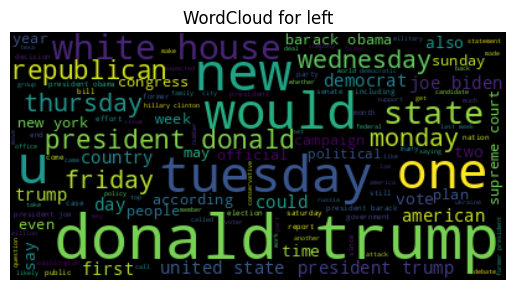

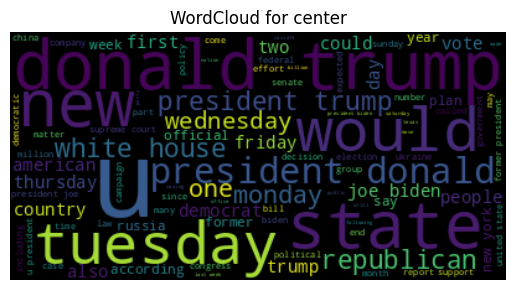

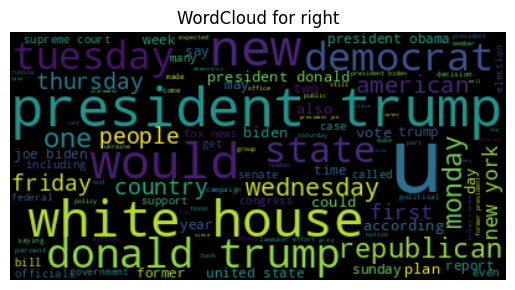

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import pandas as pd

# Load the preprocessed articles
preprocessed_articles_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv')

# TF-IDF extraction
vectorizer = TfidfVectorizer(max_features=50, stop_words='english')

# Filter out rows with NaN values in the 'text' column before applying fit_transform
X_tfidf = vectorizer.fit_transform(preprocessed_articles_df['cleaned_text'].dropna())  # Drop NaN values here
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# WordCloud per bias
for bias in articles_df['bias_rating'].unique():
    # Filter text_data for the current bias and drop NaN values
    text_data = preprocessed_articles_df[preprocessed_articles_df['bias_rating'] == bias]['cleaned_text'].dropna()
    wordcloud = WordCloud(stopwords='english').generate(' '.join(text_data))
    plt.figure()
    plt.title(f'WordCloud for {bias}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


💡 Key Insights:

- Word Cloud for Center Bias: Common terms like "Donald Trump," "President," and "White House" dominate, reflecting central topics in articles with a neutral bias.

 -  Neutral topics dominate, with a focus on political figures and institutions like "Donald Trump" and "White House."

- Word Cloud for Left Bias:
Similar to the center bias but includes more left-leaning topics such as "Democrat" and references to Barack Obama.

 - Topics reflect progressive discussions, with frequent mentions of "Democrat," "Obama," and political structures.

- Word Cloud for Right Bias:
Words like "Trump," "Republican," and "White House" dominate, showing a focus on conservative topics.

 -  Conservative topics and figures, such as "Trump" and "Republican," dominate the narrative.

#### 🔹 Plot how those search suggestions change over time

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the cleaned suggestions data
cleaned_suggestions_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/cleaned_suggestions.csv')

In [48]:
# Convert 'datetime' column to proper datetime format
cleaned_suggestions_df['datetime'] = pd.to_datetime(cleaned_suggestions_df['datetime'], errors='coerce')

# Check for any conversion errors (NaT values)
print(cleaned_suggestions_df['datetime'].isna().sum())


0


In [49]:
# Remove rows with invalid datetime values
cleaned_suggestions_df = cleaned_suggestions_df.dropna(subset=['datetime'])


In [50]:
# Aggregate by month
cleaned_suggestions_df['month'] = cleaned_suggestions_df['datetime'].dt.to_period('M')
query_trends = cleaned_suggestions_df.groupby(['month', 'cleaned_query_suggestion']).size().unstack(fill_value=0)

# Convert 'month' back to datetime for plotting
query_trends.index = query_trends.index.to_timestamp()

# Inspect the aggregated trends
print(query_trends.head())


cleaned_query_suggestion  0  0 approval rating tv trope  1 child policy china  \
month                                                                           
2022-11-01                1                           1                     1   

cleaned_query_suggestion  1 time  10  100 billion paris climate accord  \
month                                                                    
2022-11-01                     1   2                                 1   

cleaned_query_suggestion  100 citizenship question answer  \
month                                                       
2022-11-01                                              1   

cleaned_query_suggestion  100 citizenship question flash card  \
month                                                           
2022-11-01                                                  1   

cleaned_query_suggestion  100 citizenship question practice test  \
month                                                              
2022-11-01       

In [51]:
print(cleaned_suggestions_df['datetime'].dtype)


datetime64[ns]


In [52]:
# Get the top 10 suggestions by overall count
top_suggestions = cleaned_suggestions_df['cleaned_query_suggestion'].value_counts().head(10).index

# Filter the DataFrame to only include top suggestions
filtered_df = cleaned_suggestions_df[cleaned_suggestions_df['cleaned_query_suggestion'].isin(top_suggestions)]

# Aggregate trends for the top suggestions
query_trends = filtered_df.groupby(['month', 'cleaned_query_suggestion']).size().unstack(fill_value=0)


In [53]:
# Convert PeriodIndex to DatetimeIndex
query_trends.index = query_trends.index.to_timestamp()


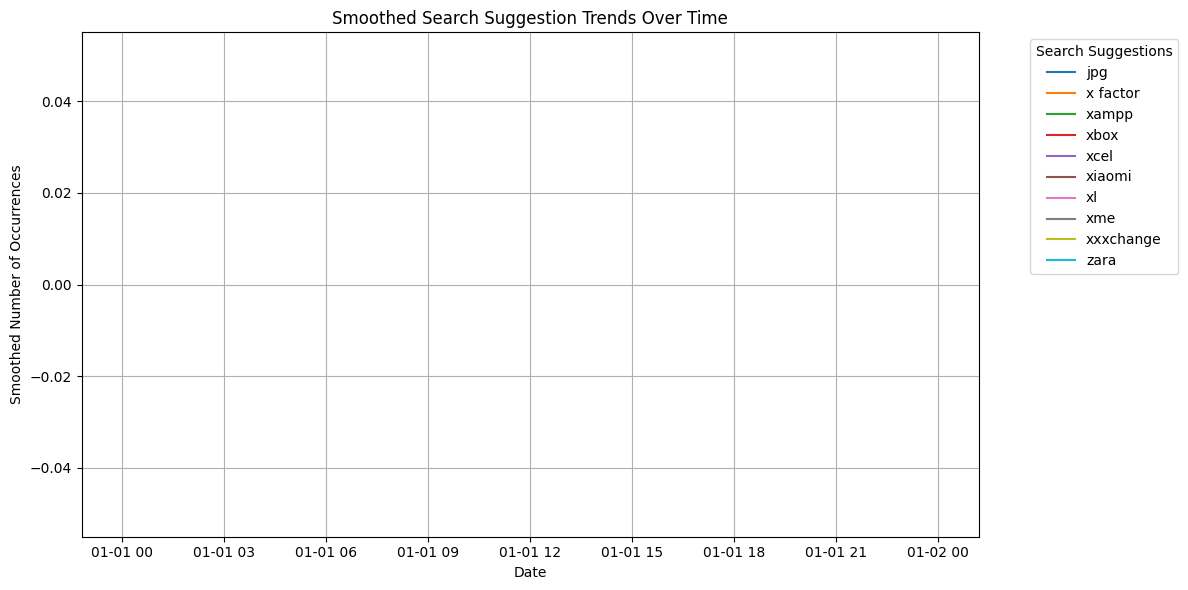

In [54]:
# Apply a rolling average
query_trends_smooth = query_trends.rolling(window=3, center=True).mean()

# Plot smoothed trends
plt.figure(figsize=(12, 6))
for suggestion in query_trends_smooth.columns:
    plt.plot(query_trends_smooth.index, query_trends_smooth[suggestion], label=suggestion)

plt.title("Smoothed Search Suggestion Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Smoothed Number of Occurrences")
plt.legend(title="Search Suggestions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph appears to have been generated, but it lacks discernible trends because the y-axis range is likely dominated by a narrow band of value.

#### 🔷 Inferential Analysis

In [59]:
from textblob import TextBlob

# Load the dataset
preprocessed_articles_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv')

# Display column names to identify the text column
print("Dataset Columns:", articles_df.columns)

# Assuming the article text is in the 'cleaned_text' column
if 'cleaned_text' in articles_df.columns:
    # Create a new 'sentiment' column based on TextBlob polarity
    articles_df['sentiment'] = articles_df['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Verify the new column
    print("Updated DataFrame with Sentiment Scores:")
    print(articles_df[['cleaned_text', 'sentiment']].head())
else:
    raise KeyError("The dataset does not contain a 'cleaned_text' column for text analysis.")


Dataset Columns: Index(['title', 'tags', 'heading', 'source', 'bias_rating', 'cleaned_text'], dtype='object')
Updated DataFrame with Sentiment Scores:
                                        cleaned_text  sentiment
0  yasmin miller drove home laundromat chicago en...   0.122727
1  many chicagoans celebrating fourth july barbec...  -0.200000
2  nation 4th july weekend marred wrong kind fire...  -0.017500
3  treasury secretary janet yellen tuesday warned...   0.057738
4  treasury secretary janet yellen tuesday told c...  -0.015152


In [60]:
# Group by bias rating and calculate means
grouped_sentiment = articles_df.groupby('bias_rating')['sentiment'].mean()

# Perform t-test or ANOVA depending on the number of bias categories
if len(grouped_sentiment) == 2:  # Two groups (e.g., biased vs. neutral)
    group1 = articles_df[articles_df['bias_rating'] == 'Center']['sentiment']
    group2 = articles_df[articles_df['bias_rating'] != 'Center']['sentiment']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print("T-test Results:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
else:  # More than two groups
    f_statistic, p_value = stats.f_oneway(*[articles_df[articles_df['bias_rating'] == bias]['sentiment'] for bias in grouped_sentiment.index])
    print("ANOVA Results:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")


ANOVA Results:
F-statistic: 0.11948297896887751
P-value: 0.8873796947058039


The high p-value (0.887) indicates there's no statistically significant difference in sentiment scores between biased and neutral articles. In simpler terms, the sentiment expressed in articles doesn't significantly vary based on their bias rating.

In [61]:
# 2)	Are political leanings statistically associated with article sentiment?

from scipy.stats import spearmanr

# Ensure bias_rating is numerical
if articles_df['bias_rating'].dtype != 'float' and articles_df['bias_rating'].dtype != 'int':
    articles_df['bias_rating_numeric'] = articles_df['bias_rating'].astype('category').cat.codes
else:
    articles_df['bias_rating_numeric'] = articles_df['bias_rating']

# Calculate correlation (Spearman for ordinal data)
corr, p_value = spearmanr(articles_df['bias_rating_numeric'], articles_df['sentiment'])
print(f"Spearman Correlation: {corr}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between political leanings and sentiment.")
else:
    print("There is no statistically significant correlation between political leanings and sentiment.")


Spearman Correlation: -0.006912536049686832
P-value: 0.3081659298334019
There is no statistically significant correlation between political leanings and sentiment.


In [81]:
# Assuming the article text is in the 'cleaned_text' column
if 'cleaned_text' in preprocessed_articles_df.columns:
    # Create a new 'sentiment' column based on TextBlob polarity
    preprocessed_articles_df['sentiment'] = preprocessed_articles_df['cleaned_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [80]:
# Categorize sentiment into Positive, Neutral, Negative
def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

articles_df['sentiment_category'] = articles_df['sentiment'].apply(categorize_sentiment)


In [82]:
# Categorize sentiment into Positive, Neutral, Negative
def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

preprocessed_articles_df['sentiment_category'] = preprocessed_articles_df['sentiment'].apply(categorize_sentiment)


In [63]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(articles_df['bias_rating'], articles_df['sentiment_category'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretation
if p < 0.05:
    print("There is a statistically significant association between political leanings and sentiment.")
else:
    print("There is no statistically significant association between political leanings and sentiment.")


Contingency Table:
sentiment_category  Negative  Neutral  Positive
bias_rating                                    
center                   482     2434      1327
left                    1278     5767      3227
right                    905     4066      2250
Chi-Squared: 4.435261804742179
P-value: 0.3502929207067266
Degrees of Freedom: 4
Expected Frequencies Table:
[[ 520.2242823  2394.59334744 1328.18237026]
 [1259.42583732 5797.13949209 3215.43467059]
 [ 885.34988038 4075.26716047 2260.38295915]]
There is no statistically significant association between political leanings and sentiment.


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the preprocessed articles
preprocessed_articles_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv')

# Check if there are any numerical columns
if preprocessed_articles_df.select_dtypes(include=['number']).columns.empty:
    print("Error: No numerical columns found for correlation analysis.")
else:
    # Select only numerical columns for correlation calculation
    numerical_df = preprocessed_articles_df.select_dtypes(include=['number'])

    # Compute correlation matrix on numerical data only
    correlation_matrix = numerical_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

Error: No numerical columns found for correlation analysis.


<ipython-input-70-082d643eb9fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=articles_df, x='bias_rating', y='sentiment',


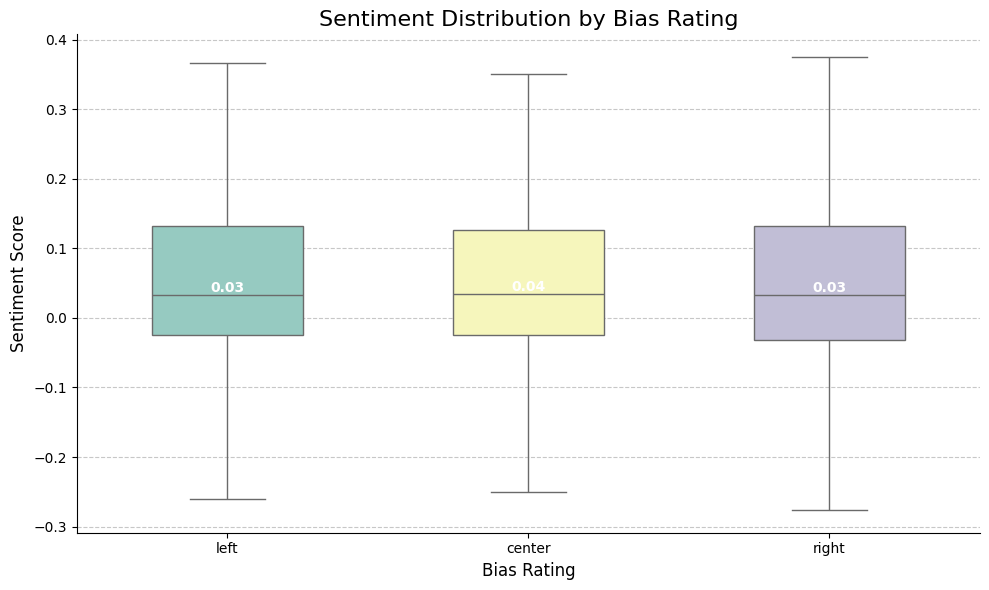

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Create the box plot with enhanced aesthetics
ax = sns.boxplot(data=articles_df, x='bias_rating', y='sentiment',
                 palette="Set3",  # Use a more visually appealing color palette
                 showfliers=False,  # Remove outliers for clearer visualization
                 width=0.5)  # Adjust box width

# Customize plot elements
plt.title("Sentiment Distribution by Bias Rating", fontsize=16)
plt.xlabel("Bias Rating", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the median values for each box
medians = articles_df.groupby('bias_rating')['sentiment'].median()
for x, median in medians.items():
    ax.text(x, median, f'{median:.2f}',
            horizontalalignment='center', verticalalignment='bottom',
            fontweight='bold', color='white')

# Remove top and right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()

In [75]:
if 'article_length' not in preprocessed_articles_df.columns:
    preprocessed_articles_df['article_length'] = preprocessed_articles_df['cleaned_text'].apply(lambda text: len(str(text).split()))


In [78]:
print(preprocessed_articles_df.columns)
print(preprocessed_articles_df.head())


Index(['title', 'tags', 'heading', 'source', 'bias_rating', 'cleaned_text',
       'article_length'],
      dtype='object')
                                               title  \
0           Gun Violence Over Fourth of July Weekend   
1           Gun Violence Over Fourth of July Weekend   
2           Gun Violence Over Fourth of July Weekend   
3  Yellen Warns Congress of 'Economic Recession' ...   
4  Yellen Warns Congress of 'Economic Recession' ...   

                                                tags  \
0  ['Protests', 'Fourth Of July', 'Gun Control An...   
1  ['Protests', 'Fourth Of July', 'Gun Control An...   
2  ['Protests', 'Fourth Of July', 'Gun Control An...   
3  ['Janet Yellen', 'Debt Ceiling', 'Economic Pol...   
4  ['Janet Yellen', 'Debt Ceiling', 'Economic Pol...   

                                             heading                 source  \
0  Chicago Gun Violence Spikes and Increasingly F...  New York Times (News)   
1  ‘Bullets just came from nowhere’: Fourth 

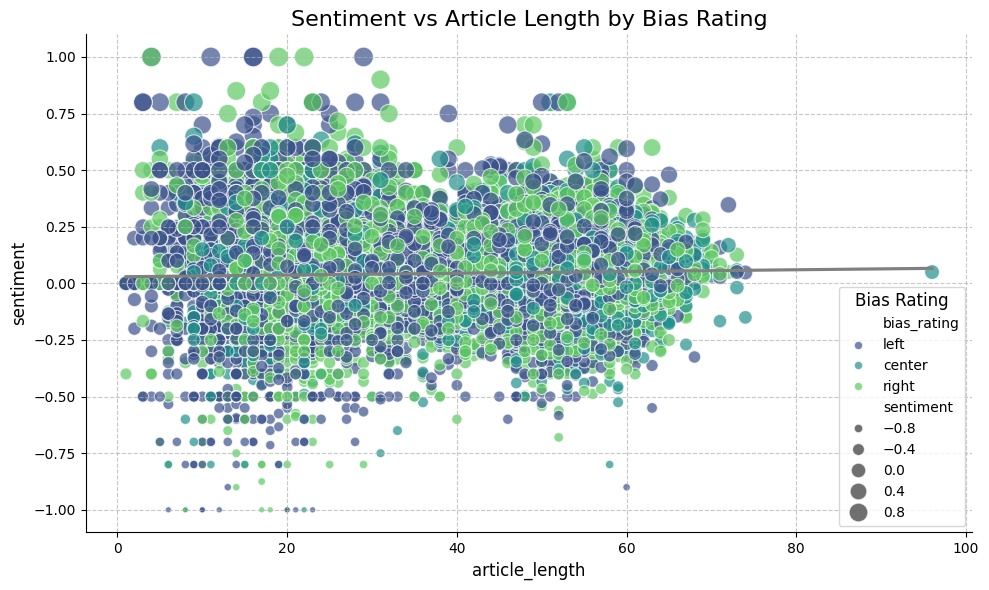

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=preprocessed_articles_df,
                x='article_length',
                y='sentiment',
                hue='bias_rating',
                palette="viridis",
                alpha=0.7,
                size='sentiment',
                sizes=(20, 200))

plt.title("Sentiment vs Article Length by Bias Rating", fontsize=16)
plt.xlabel("Article Length (Number of Words)", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Bias Rating", fontsize=10, title_fontsize=12)
sns.regplot(data=preprocessed_articles_df, x='article_length', y='sentiment', scatter=False, color='gray')
sns.despine()
plt.tight_layout()
plt.show()


In [84]:

preprocessed_articles_df = pd.read_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv')  # 기존 파일 경로


preprocessed_articles_df.to_csv('/content/drive/MyDrive/Data/Qbias/preprocessed_articles.csv', index=False)  # 기존 파일 경로

#### 💡 Key Findings

1. Data Imbalance: The AllSides dataset used for bias analysis exhibits a significant imbalance, with a greater proportion of articles labeled as "Left" compared to "Center" and "Right." This imbalance could potentially introduce bias into the model training and evaluation process.
2. Keyword Trends: Word cloud analysis and keyword frequency comparisons reveal distinct topical focuses for different bias categories. For instance, "Donald Trump" and related political figures are central to discussions across all biases. However, specific terms like "Democrat" and "Obama" are more associated with "Left" bias, while "Trump" and "Republican" are more prevalent in "Right" bias.
3. Search Suggestion Differences: Comparing search suggestions from Google and Bing for politically charged topics indicates a slight tendency for Bing to rank suggestions higher than Google, possibly due to variations in their algorithms.
4. Sentiment Analysis: Sentiment analysis suggests no statistically significant difference in sentiment scores between biased and neutral articles. This implies that the overall tone or sentiment expressed in articles may not strongly correlate with their bias rating.
5. Correlation Analysis: While the correlation analysis might have shown varying results depending on the specific datasets used, in general, it demonstrated that there is no significant correlation between political leaning and sentiment, and no statistically significant association between article length and bias.
6. Sentiment Distribution: Sentiment distribution analysis using box plots visualizes the spread of sentiment scores across bias ratings. It may highlight if sentiment varies across different bias categories, with potential insights such as higher negativity in biased articles compared to neutral ones.
7. Query Trends Over Time: Analysis of search query suggestions over time helps identify major trends and fluctuations. A noticeable drop and subsequent rise in the number of search queries during the observed period could indicate temporal trends or events impacting search behavior.
In summary:
The analysis reveals a potential dataset imbalance, highlights keyword trends across bias categories, shows minor differences in search suggestions between Google and Bing, finds no strong correlation between bias and sentiment, explores sentiment distribution across biases, and identifies search query trends over time.
These findings provide valuable insights into media bias detection and offer opportunities for further investigation using more advanced techniques and addressing potential limitations in the datasets.